In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("StudentsPerformance.csv")


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We have no null values in this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


total 1000 rows*8colulmns in the dataset as int64 and object being the only two dtypes

In [6]:
df.duplicated().sum()

0

There are no duplicate values in this dataset


In [7]:
df.nunique()#unique values for each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score i.e  0 for math, for writing  the minimum value is much higher i.e 10 and for reading even higher i.e 17

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("categories in 'gender' column :",df["gender"].unique())
print("categories in 'race/ethnicity'column :",df["race/ethnicity"].unique())
print("categories in 'parental level  of education' column :",df["parental level of education"].unique())
print("categories in 'lunch' column:",df["lunch"].unique())
print("categories in 'test preperation course' column",df["test preparation course"].unique())
print("categories in 'math score' column:",df["math score"].unique())
print("categories in 'reading score' column:",df["reading score"].unique())
print("categories in 'writing score' column:",df["writing score"].unique())

categories in 'gender' column : ['female' 'male']
categories in 'race/ethnicity'column : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level  of education' column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' column: ['standard' 'free/reduced']
categories in 'test preperation course' column ['none' 'completed']
categories in 'math score' column: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
categories in 'reading score' column: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26

In [13]:
df["total score"]=df['math score'] +df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full= df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20= df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
- From above values we know that the students have performed the worst in maths
- The data shows that the students performed the best in reading section


### EDA(Exploratory Data Visualization)
Firstly we will conduct histogram and kde visualization


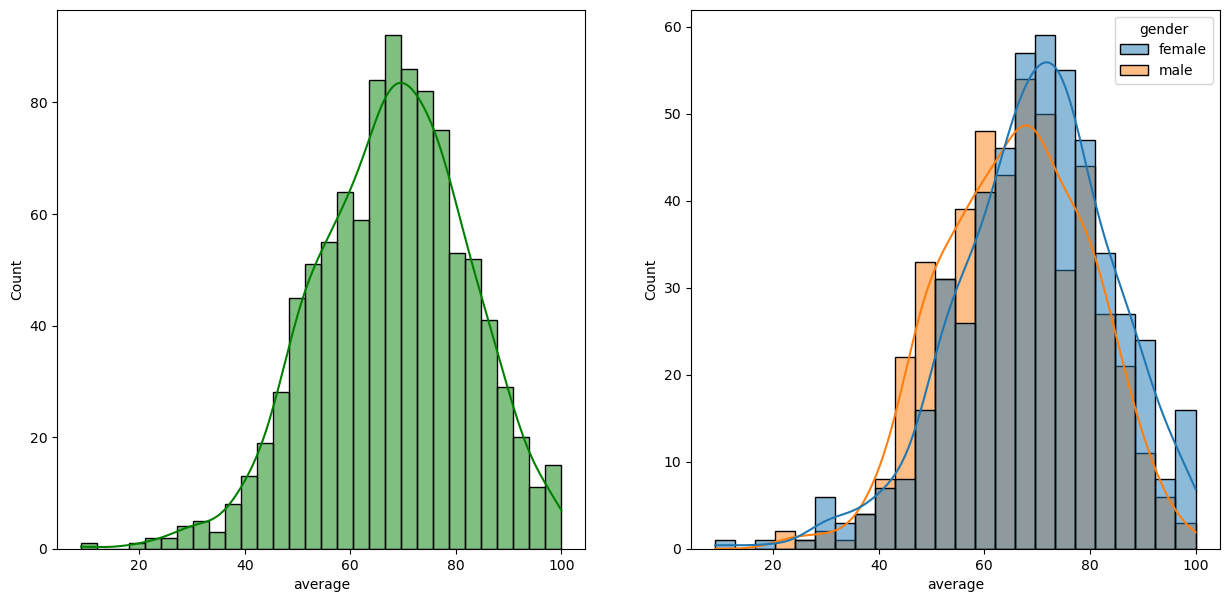

In [16]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


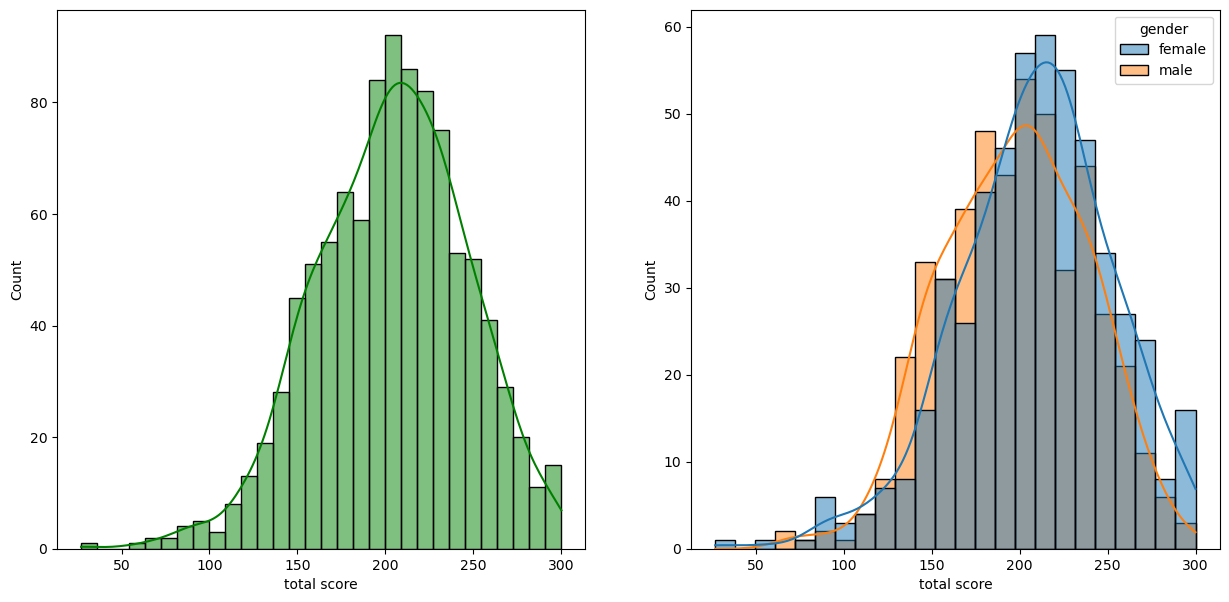

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="total score",kde=True,hue='gender' )
plt.show()

## Insight
From the observation of the histplots based on average and total score
Female students have performed better than male students as per the trends


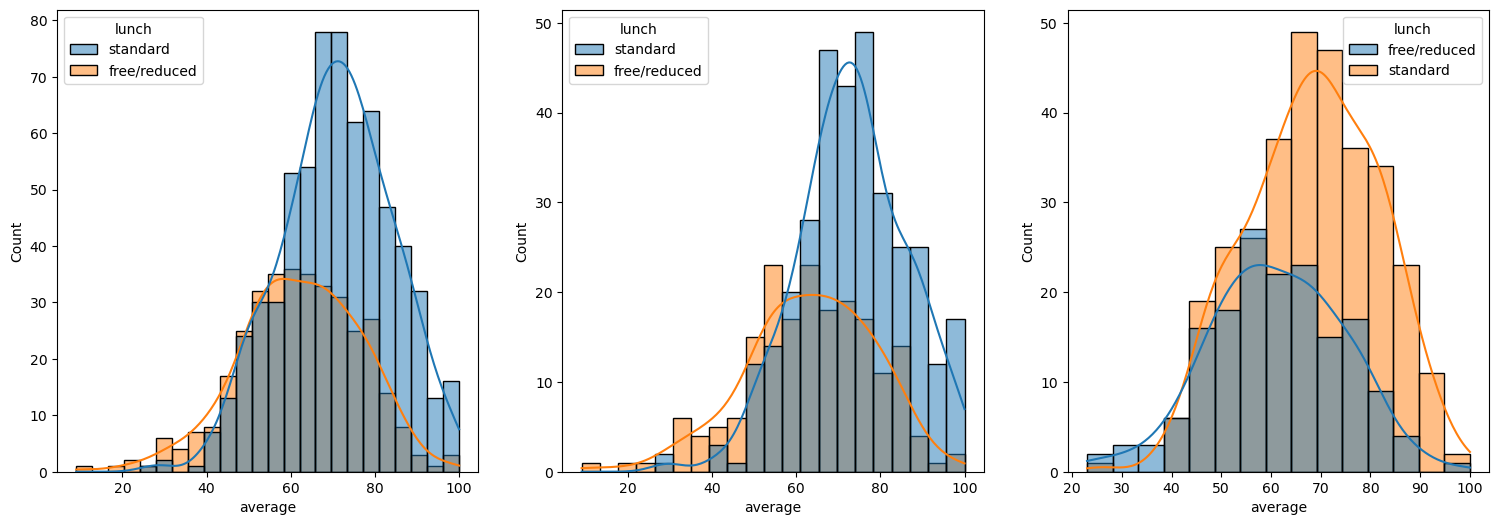

In [26]:
plt.figure(figsize=(25, 6)) 
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="lunch")#kde=True means that it gives a curve on the fig
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="lunch")
plt.show()

## Insights
- Standard lunch helps perform better in test
- Regardless of gender, standard lunch helps in better scores

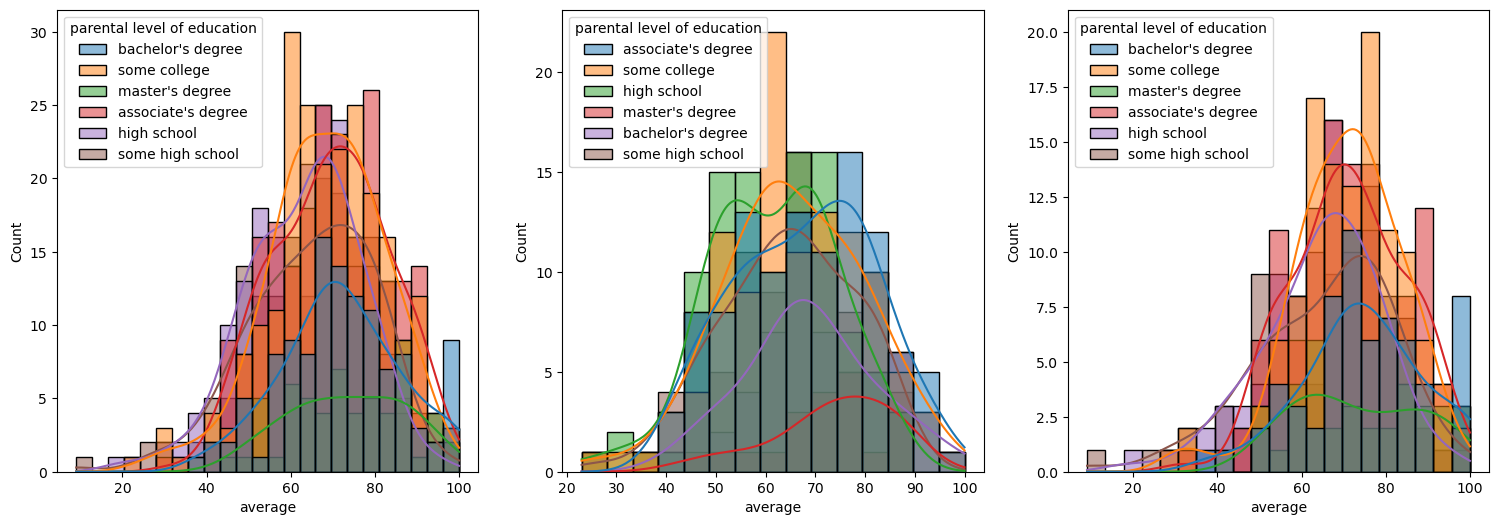

In [27]:
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=="male"],x="average",kde="True",hue="parental level of education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="female"],x='average',kde=True,hue="parental level of education")
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam i.e the curve's peak are in the more right part of the range

- 3rd plot we can see there is no effect of parent's education on female students i.e the curves' peak are almost in the same range

In [ ]:
#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students